In [217]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from khajiit_common.intermediate_results_caching import Vault
from tqdm.auto import tqdm
import torch
pd.options.display.max_colwidth=5000

In [218]:
HEADER_TEST = ['id', 'title', 'text']
HEADER_TRAIN = ['id', 'title', 'text', 'tags']
RANDOM_SEED = 442
TEST_SIZE = .1
EXPERIMENT_NAME = 'ya_champ_multiclass'

In [219]:
def set_random_seed(seed, cudnn_deterministic=False):
    random.seed(seed)
    np.random.seed(seed)

    torch.manual_seed(seed)

    torch.cuda.manual_seed(seed)
    if torch.cuda.device_count() > 0:
        torch.cuda.manual_seed_all(seed)

    if cudnn_deterministic:
        torch.backends.cudnn.deterministic = True
    else:
        torch.backends.cudnn.deterministic = False

In [220]:
def get_file_iterator(file):
    for line in file:
        yield line #.readline()

In [221]:
set_random_seed(RANDOM_SEED)

In [222]:
def get_data(path, col_no=4, header=HEADER_TRAIN):
    count = 0
    junk_rows = {k: [] for k in np.arange(col_no)}
    junk_row_numbers = {k: [] for k in np.arange(col_no)}
    train_data_clean = {k: [] for k in header}
    with open(path, encoding='utf-8') as src_file:
        f_iter = get_file_iterator(src_file)
        for i, line in enumerate(f_iter):
            count += 1
            row = line.replace('\n', '').split('\t')
            if len(row) >= col_no - 1:
                if len(row) == col_no:
                    for j, k in enumerate(header):
                        train_data_clean[k].append(row[j].strip())
                elif col_no == 3:
                    train_data_clean[header[0]].append(row[0])
                    train_data_clean[header[1]].append(' ')
                    train_data_clean[header[2]].append(row[-1].strip())
#                     else:
#                         train_data_clean[header[2]].append(row[-2])
#                         train_data_clean[header[3]].append(row[-1])
                    
    #         if count > 10:
    #             break
            else:
                junk_rows[len(row)].append(row)
                junk_row_numbers[len(row)].append(i)
    train_data_clean = pd.DataFrame.from_dict(train_data_clean)
    train_data_clean['concatted_text'] = train_data_clean[['title', 'text']].apply(lambda row: '. '.join([row['title'], row['text']]).strip(), axis=1)
    train_data_clean.loc[train_data_clean['concatted_text'].str.startswith('. '), 'concatted_text'] = train_data_clean.loc[train_data_clean['concatted_text'].str.startswith('. '), 'concatted_text'].str[2:]
    mlb = MultiLabelBinarizer()
    if col_no > 3:
        train_data_clean['tags'] = train_data_clean['tags'].apply(lambda x: [int(nmbr) for nmbr in x.split(',')])
        mlb.fit(train_data_clean['tags'])
        train_data_clean['tags'] = [tag_list for tag_list in mlb.transform(train_data_clean['tags'])]
    return train_data_clean, mlb, junk_rows, junk_row_numbers

In [223]:
train_clean, mlb, junk, junk_no = get_data('data/train.tsv', 4, HEADER_TRAIN)

In [199]:
test_clean, mlb, junk, junk_no = get_data('data/test.tsv', 3, HEADER_TEST)

In [167]:
vault = Vault('processed', 'intermediate_results')

In [169]:
# vault.train_data_clean = train_clean
# vault.test_data_clean = test_clean

In [168]:
train_clean = vault.train_data_clean
test_clean = vault.test_data_clean

In [170]:
# for k in junk_rows.keys():
#     print(len(junk_rows[k]))

In [226]:
junk_no

{0: [],
 1: [2444,
  2445,
  2446,
  6550,
  6551,
  7211,
  7212,
  7213,
  7214,
  7215,
  7216,
  7217,
  7218,
  7219,
  9524,
  9525,
  9526,
  9527,
  9528,
  9529,
  9530,
  9531,
  9532,
  9533,
  9907,
  10665,
  10666,
  10667,
  14469,
  14470,
  15399,
  16086,
  20607,
  20608,
  20609,
  21515,
  26607,
  26608,
  28058,
  28691,
  28692,
  31340,
  31341,
  32956,
  35938,
  35939,
  37838,
  41057,
  41058,
  42642,
  42643,
  42644,
  43528,
  43529,
  43530,
  43531,
  43532,
  43533,
  43534,
  43535,
  43536,
  49871,
  49872,
  49873,
  49874,
  49875,
  49876,
  49877,
  49878,
  49879,
  49880,
  49881,
  49882,
  49883,
  49884,
  49885,
  49886,
  49887,
  49888,
  53226,
  53227,
  53800,
  57064,
  57065,
  62055,
  62296,
  65306,
  65307,
  65308,
  65309,
  65310,
  65311,
  65312,
  65313,
  65314,
  66639,
  66640,
  80653,
  81070,
  81131,
  81132,
  81133,
  81134,
  81135,
  81136,
  81137,
  86878,
  86879,
  86919,
  88770,
  88771,
  88772,
  8877

In [234]:
test = train_clean['tags'].apply(sum)

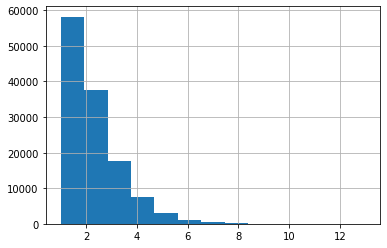

In [247]:
test.hist(bins=13);

In [241]:
test.quantile()

2.0

In [242]:
test.value_counts()

1     58202
2     37649
3     17625
4      7494
5      3033
6      1157
7       457
8       185
9        66
10       46
11       13
12        5
13        1
Name: tags, dtype: int64

In [133]:
test = train_clean['title'].apply(len)

In [204]:
train_sub = train_clean.sample(1000)

In [213]:
STRIDE = 10
i = -STRIDE

In [216]:
i += STRIDE
train_sub.iloc[i: i+STRIDE][['concatted_text']]

concatted_text
50678                                                                                                                                                                                                                                                                            15 советов - как провести время в "пробке" с пользой. Время – это единственный ресурс, которого всегда не хватает. Становится невыносимо обидно, когда попусту теряешь его. К сожалению, не всегда можно контролировать этот процесс. Стоило бы задуматься, сколько драгоценных минут вы теряете в пробках, а ведь они складываются в часы и дни вашей жизни. Как можно с пользой провести это вдруг ставшее свободным время? Несколько простых советов для тех, кто стоит в пробке  ① Оглянитесь вокруг, посмотрите на людей, с которыми вы оказались рядом. Обратите внимание на водителя в соседнем автомобиле, проанализируйте его. Кем может работать этот человек? Какая у него семья? Есть ли у него увлечения? Если вы будете делать такие упражнения постоянно, то сможете научиться лучше разбираться в психологии людей. Тем более что такие наблюдения будут довольно увлекательными. ② В наше время в каждой машине, к счастью, обязательно есть радио, а у любого водителя при себе телефон. Участвуйте в различных конкурсах, викторинах, поздравляйте друзей и родных, заказывайте свои любимые песни – развлекайтесь. ③ Достаньте свой ежедневник и просмотрите, кому вы должны позвонить. Все время, которое вы потеряли бы напрасно, теперь можно истратить на то, чтобы сделать пару важных или неотложных звонков. Теперь вам уже не придется тратить на это ваши силы весь следующий день. ④ Давно не слушали любимую музыку? Есть возможность вспомнить любимые песни и даже спеть вместе с кумиром. Ваше настроение поднимется. Берегите нервы. Ждать, конечно, сложно, но есть случаи, когда от вас мало что зависит. Ваше раздражение не сделает ваш путь к назначенному месту быстрее. Зато у вас появляется уникальная возможность расслабиться и подумать о чем-то хорошем.  ⑤ Медитируйте, приятные мысли помогут вам отдохнуть. ⑥ Автомобильная пробка – повод еще раз вспомнить о своем здоровье. Есть довольно большое количество упражнений, которые можно делать даже сидя в автомобиле, они не требуют места, а пользу принесут немалую. На такой случай подойдут упражнения для улучшения зрения, можете размять шею, запястья. Можно придумать свой личный комплекс упражнений, особенно если вы за рулем проводите значительную часть вашего времени и редко посещаете спортзал. Упражнения для глаз Выберите два произвольных объекта, один на близком расстоянии, а второй находящийся вдали от вас. Ваша задача поочередно фокусировать взгляд в этих точках и задерживать в течение одинакового периода времени. Начните с нескольких секунд. Сделайте 10 раз.  Быстро поморгайте, делайте движения глазами вверх-вниз, вправо-влево, нарисуйте восьмерку. Сделайте по 5 повторений каждого упражнения и дайте глазам отдохнуть. Упражнения для суставов  Разомните пальцы, сделайте массаж. Сожмите пальцы в кулак и делайте вращательные движения сначала в одну затем в другую сторону. Сделайте несколько наклонов головы в разных направлениях, попробуйте кончиком носа написать в воздухе цифры от 1 до 10 и обратно. ⑦ Займитесь планированием. Что сделаете сегодня вечером, через день, а куда пойдете на выходные с друзьями или с семьей. ⑧ Самое время взять карту и внимательно изучить объездные пути, найти другие маршруты, которыми вы сможете пользоваться в будущем. Продумайте, как лучше продолжить свой путь в том районе, где вы находитесь.  ⑨ Даже попадая в пробку, вы можете заниматься саморазвитием. Совершенствуйте свои знания иностранных языков, прослушивайте новые художественные произведения или учебную литературу. Вам поможет любая новая информация, записанная на аудионосителях. Расширяйте круг ваших интересов, узнавайте новое, и время пройдет плодотворно и незаметно. ⑩ Вспомните, как был одет сосед, когда выходил из дома, запомните номера машин в правом ряду.

In [861]:
test_clean.head()

id  \
0  126048   
1  126049   
2  126050   
3  126051   
4  126052   

                                                                      title  \
0                                                Стадии любовных отношений    
1                                                    Ставридка черноморская   
2          Килька в томате "Морская миля". Дорогое "Дежавю" на тему кильки.   
3                                               Счастливая история Филимоши   
4  Плевать ли Путину на Россию ? Кому из правительства есть дело до страны.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [866]:
test_clean[test_clean['title'] == 'no_title']

,id,title,text
343,126391,no_title,20 самых необычных подарков с AliExpress на Новый год
424,126472,no_title,Прикольные картинки /17/
914,126962,no_title,Эскизы «ОФИГЕННЫХ» татуировок 31п.
1684,127732,no_title,Прекрасное релаксирующее видео для женщин. Домашние хлопоты без напряга..
1900,127948,no_title,"20 удивительных гибридов кошек и птиц, созданных с помощью Photoshop"
3388,129436,no_title,♫♫ Поём вместе Макс Барских - моя любовь ))
3482,129530,no_title,10 мужчин в существование которых сложно поверить
3677,129725,no_title,"Картофельные зразы с грибами.Вроде очень просто,но как же вкусно получается.Potato zrazy"
3833,129881,no_title,Тгл чистая вода
4028,130076,no_title,Объёмная открытка на хэллоуин🧜‍♂️


In [851]:
for k in junk.keys():
    print(len(junk[k]))

0
0
0


In [846]:
junk[2]

[['126962', 'Эскизы «ОФИГЕННЫХ» татуировок 31п.'],
 ['127732',
  'Прекрасное релаксирующее видео для женщин. Домашние хлопоты без напряга..'],
 ['127948',
  '20 удивительных гибридов кошек и птиц, созданных с помощью Photoshop'],
 ['129436', '♫♫ Поём вместе Макс Барских - моя любовь ))'],
 ['129530', '10 мужчин в существование которых сложно поверить'],
 ['129725',
  'Картофельные зразы с грибами.Вроде очень просто,но как же вкусно получается.Potato zrazy'],
 ['129881', 'Тгл чистая вода'],
 ['130076', 'Объёмная открытка на хэллоуин🧜\u200d♂️'],
 ['130110', 'Лето время выращивать лодки'],
 ['130459', '📌 Бывший футболист сборной России распек хоккейную молодежку'],
 ['130599', 'Сухой ручей в ландшафтном дизайне сада — идеи для вдохновения'],
 ['130896', 'Как находят преступников в DeepWeb. "Темная сторона" Интернета.'],
 ['131136', "Aston Martin DP215  Sotheby's 1963"],
 ['131317', 'Истории из жизни детей'],
 ['131510', 'Мужской стейк, все просто, все понятно и без слов'],
 ['131613', 'Ви

In [844]:
test_clean.loc[junk_no[2][0]-1: junk_no[2][0]]

,id,title,text
913,126961,Звезды Болливуда на очередной свадьба: лучшие наряды вечера,"В минувшие выходные состоялась свадьба Иши Амбани, дочери известных индийских предпринимателей Мукеша и Ниты Амбани. Семья уже много лет водит дружбу с болливудскими звездами, поэтому гостями церемонии стали многие деятели индийского кино. Так, торжество, прошедшее на острове Комо в Италии, посетили Амир Кхан с супругой Киран Рао, Анил Капур, Маниш Мальхотра. Приянка Чопра прилетела поздравить молодоженов вместе со своим женихом Ником Джонасом. Пара предстала в национальных костюмах. Джанхви Капур выбрала для торжества расшитое стразами платье в пол. В числе приглашенных на свадьбу оказалась и Сонам Капур с супругом. Актриса была просто очаровательна в платье дизайнера Прии Ахуджи. Посетили торжество также Джухи Чавла и Каран Джохар. Продолжение читайте здесь."
914,126963,Фруктовый салат с йогуртом и Syntha-6 / рецепт от шеф-повара Аррона Сейна,"Нужно больше протеина? О, да! Шеф-повар Аррон Сейн делает из простого ванильного йогурта с корицей высокопротеиновый фруктовый салат с помощью SYNTHA-6. Я Аррон Сейн, и я считаю, что приготовление пищи – это свобода самовыражения. Блюдо, которое мы готовим сегодня, – очень простой и понятный рецепт фруктового салата с натуральными ингредиентами. Мы возьмем для него разные ягоды: клубника, черника, малина, ежевика – любые подойдут. Даже если вы новичок на кухне, этот рецепт – лучший вариант для того, чтобы начать. Он заставит вашу фантазию работать в нужном направлении. Этот салат я люблю использовать в качестве перекуса. И вкус ванильного мороженого его отлично дополняет. Он утихомирит самого дикого зверя внутри вас. Состав очень простой: мед, экстракт ванили, греческий йогурт, ягоды и еще один ингредиент, достаточно неожиданный – протеин SYNTHA-6 со вкусом ванильного мороженого. Даже самые крутые спортсмены едят йогурт – и не пытайтесь делать вид, что это не так. Этот салат универсален, его можно есть, сколько угодно. Так что просто возьмите и приготовьте его, потому что это - беспроигрышный вариант. Ингредиенты: 1 чашка обезжиренного греческого йогурта без добавок 2 чайные ложки меда 2 черпачка протеина Syntha-6 со вкусом ванильного мороженого 1 чашка нарезанной клубники 1 чашка черники 1 чашка ежевики 1 чашка малины ¼ чашки стружки миндаля, несоленого 2 чайные ложки корицы 1 столовая ложка экстракта ванили Порядок приготовления: В большую миску выложить йогурт, добавить в него мед и ванильный экстракт. Тщательно перемешать до получения однородной массы. Всыпать в смесь все ягоды и аккуратно перемешать. Добавить 2 черпачка протеина SYNTHA-6 со вкусом ванильного мороженого и снова перемешать. Сверху посыпать миндальной стружкой."
